In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


In [2]:
col=["col1","col2","col3","col4","col5","col6","col7","col8","col9","col10","col11","col12","col13","col14"]
data=pd.read_csv('/kaggle/input/boston-house-prices/housing.csv',sep='\s+', names=col)

In [3]:
x=data.drop('col14',axis=1)
y=data['col14']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
scaler=StandardScaler()
ix_norm=scaler.fit_transform(x)
x_norm=scaler.fit_transform(x_train)
x_test_norm=scaler.fit_transform(x_test)

In [5]:
sgdr=SGDRegressor(max_iter=100000,alpha=0.00001)
sgdr.fit(x_norm,y_train)
y_pred=sgdr.predict(x_norm)

In [6]:
print(f"Training accuracy: {sgdr.score(x_norm, y_train)*100}")
print("Testing accuracy is: ", sgdr.score(x_test_norm, y_test)*100)
print("Model accuracy is: ", r2_score(y, sgdr.predict(ix_norm))*100)

Training accuracy: 74.97574046520178
Testing accuracy is:  61.90884359801896
Model accuracy is:  73.35814666722084


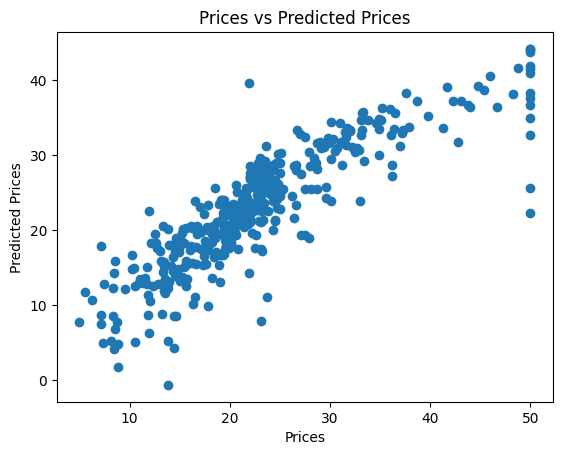

In [7]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()